# ***Vaishnavee S***
Data Science Intern at Oasis Infobyte

**TASK 3 PROBLEM STATEMENT** : The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car priceprediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.Import all the required libraries

In [2]:
import pandas as pd # for data analysis
import numpy as np # for data analysis
import matplotlib.pyplot as plt # for data viz
import seaborn as sns # for data viz
import warnings # ignoring some errors generated by seaborn
warnings.filterwarnings('ignore')


1.Import dataset

In [73]:
data = pd.read_csv('/content/drive/MyDrive/car data.csv')
data


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
data.dtypes
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

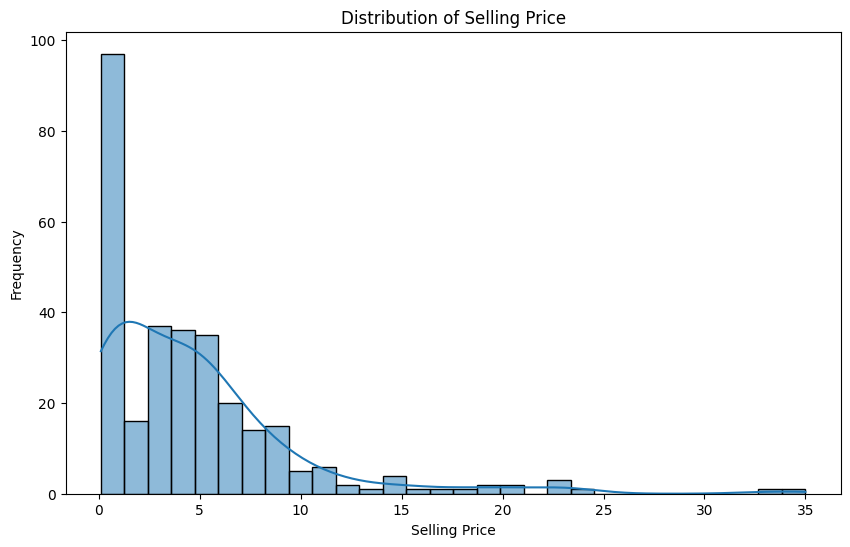

In [17]:
# Visualize the distribution of the target variable (Selling_Price)
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

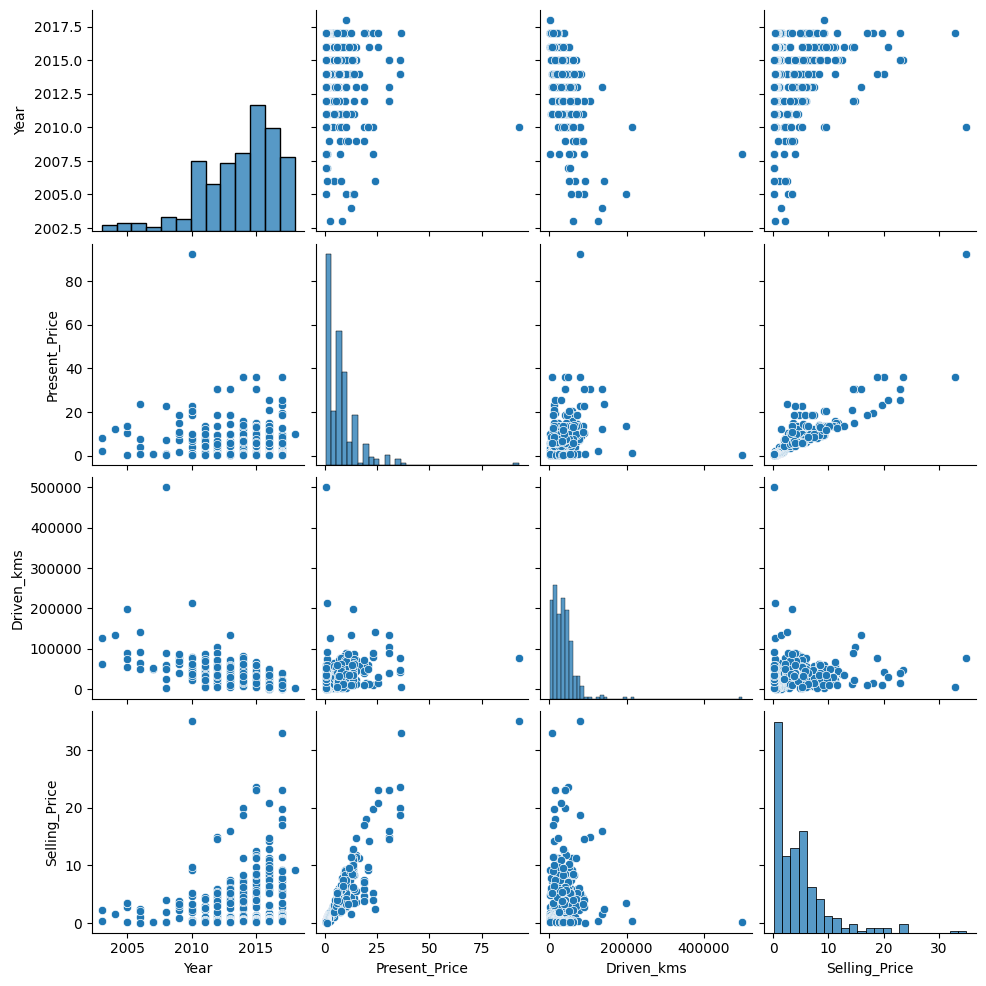

In [21]:
sns.pairplot(data, vars=['Year', 'Present_Price', 'Driven_kms', 'Selling_Price'], palette = 'Dark2')
plt.show()

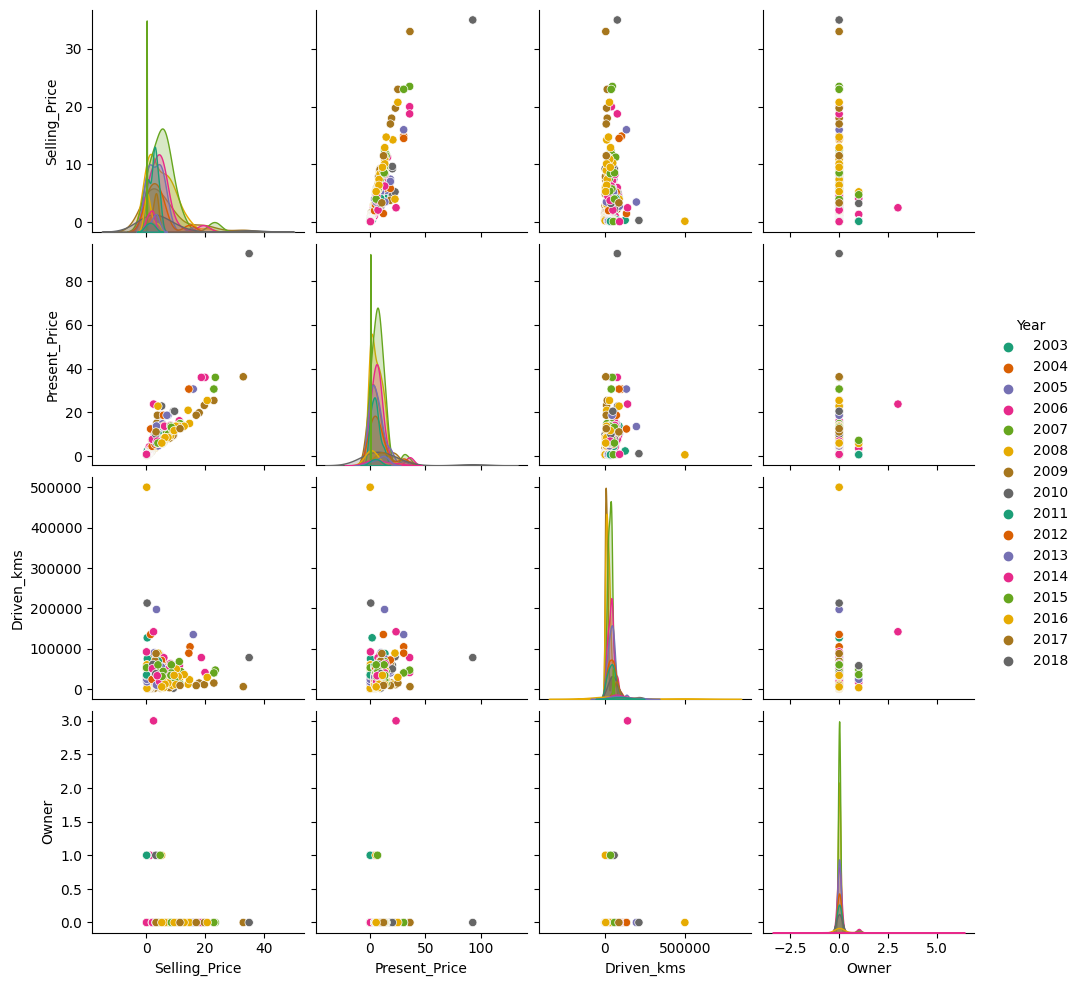

In [15]:
sns.pairplot(data, hue='Year', palette = 'Dark2')

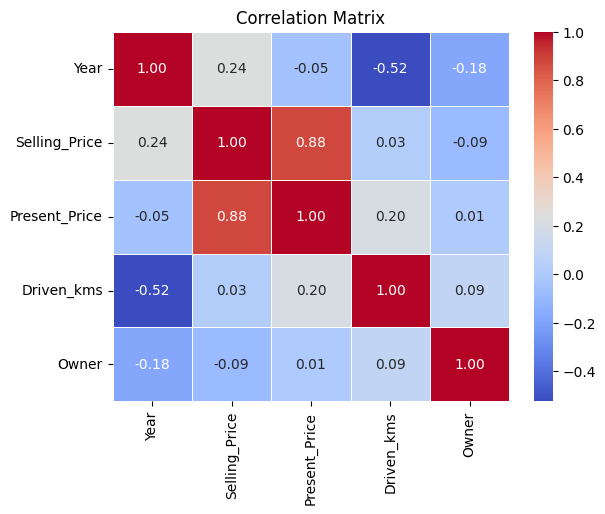

In [30]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


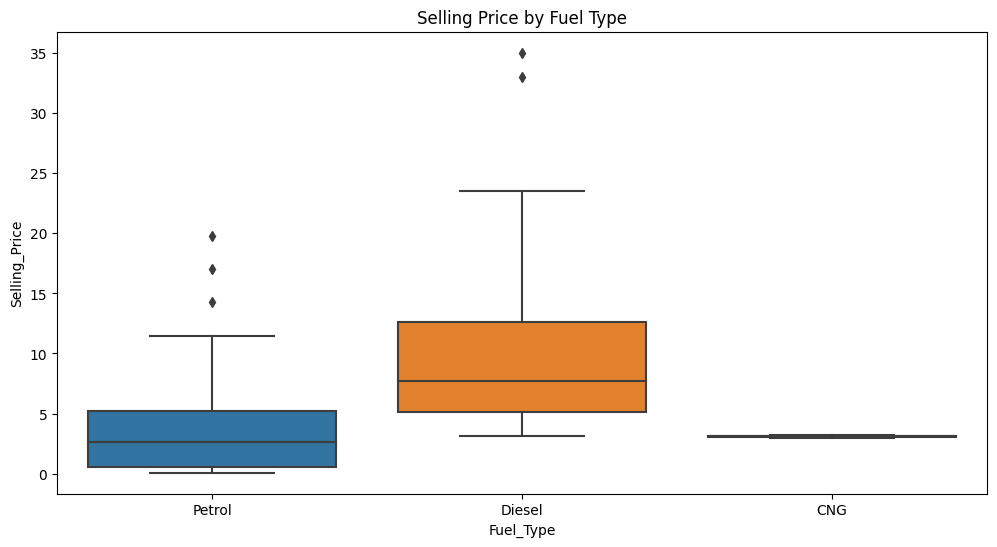

In [26]:
# Box plot for categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Selling Price by Fuel Type')
plt.show()

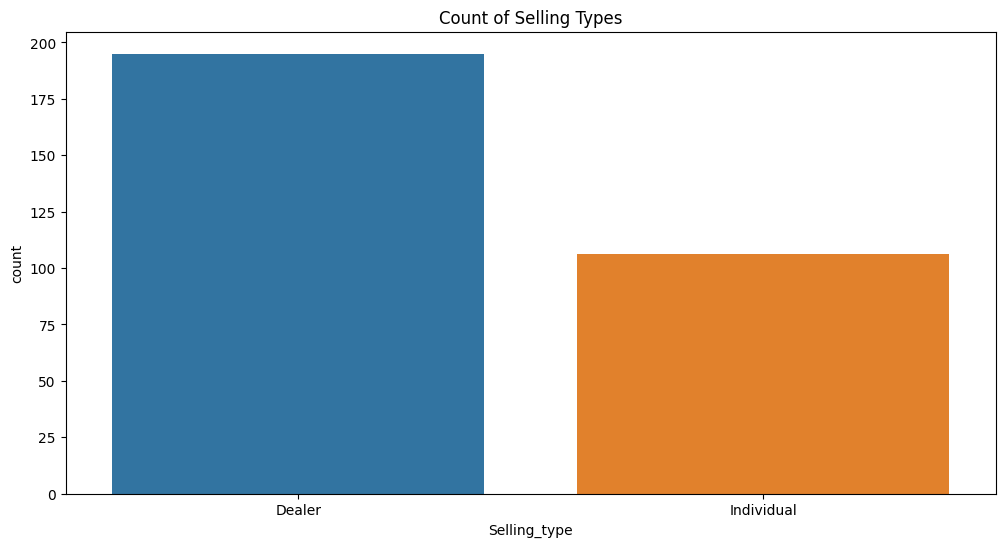

In [27]:
# Count plot for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='Selling_type', data=data)
plt.title('Count of Selling Types')
plt.show()

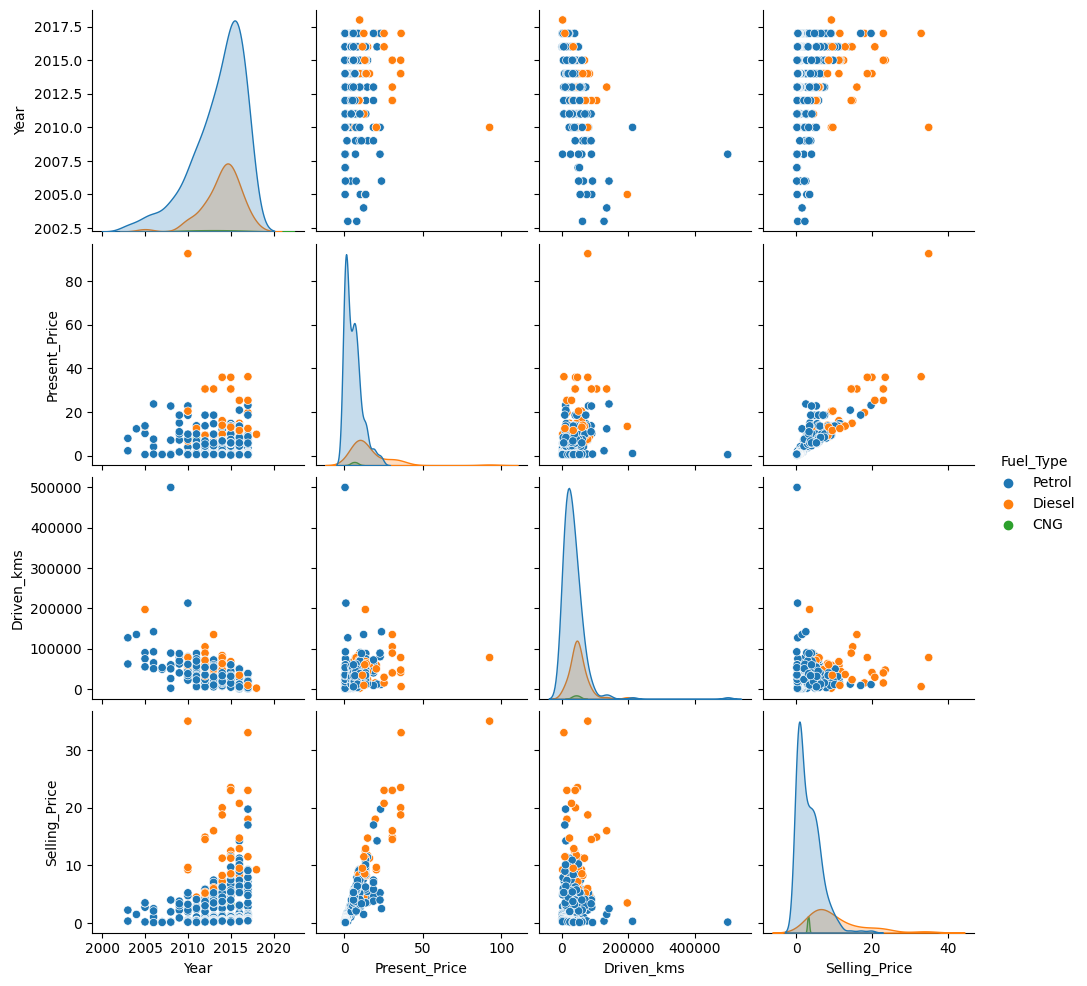

In [31]:
sns.pairplot(data, vars=['Year', 'Present_Price', 'Driven_kms', 'Selling_Price'], hue='Fuel_Type')
plt.show()

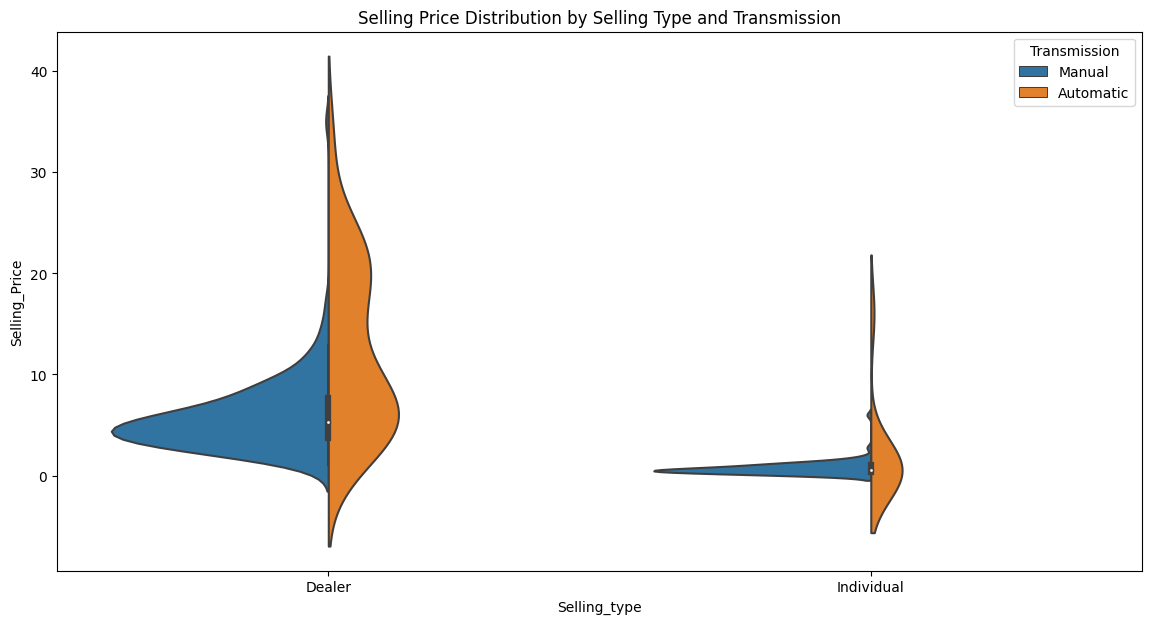

In [32]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Selling_type', y='Selling_Price', hue='Transmission', data=data, split=True)
plt.title('Selling Price Distribution by Selling Type and Transmission')
plt.show()


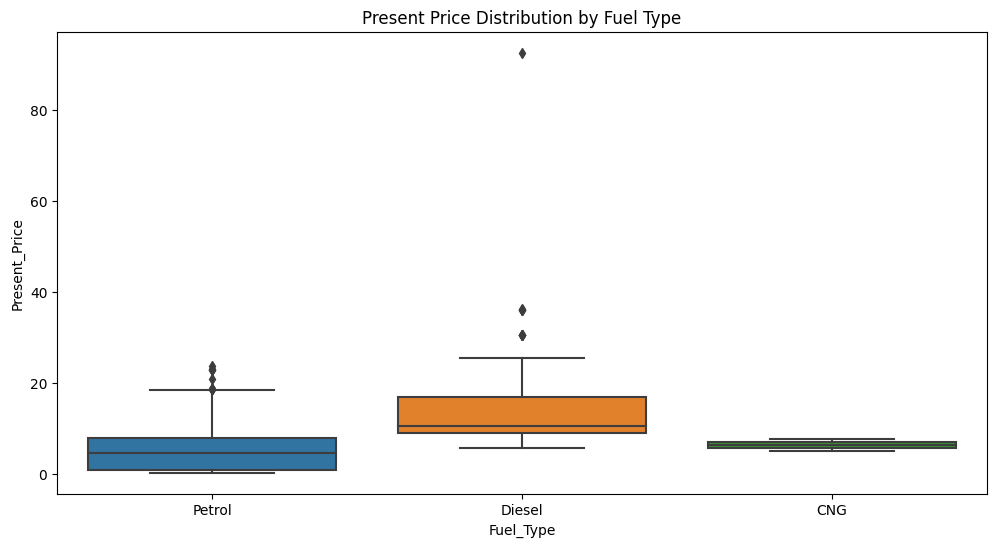

In [36]:
 #Example for 'Fuel_Type'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Present_Price', data=data)
plt.title('Present Price Distribution by Fuel Type')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [38]:
features = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission']
target = 'Selling_Price'
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['Year', 'Present_Price', 'Driven_kms']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [39]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8723871159016386
R-squared: 0.9621287180651648


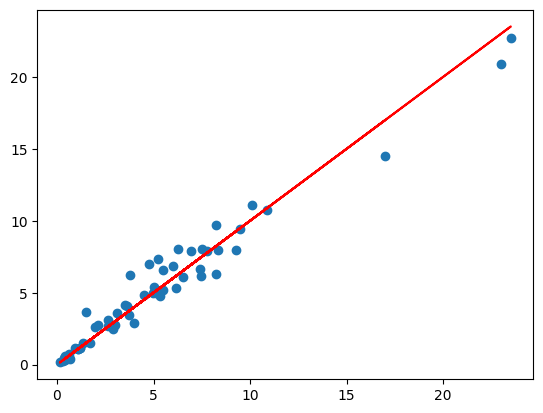

In [42]:
# Our predictions
plt.scatter(y_test,y_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')